In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. 백화점 건물번호 리스트 추출
building_info = pd.read_csv('data/building_info.csv')
train_processed = pd.read_csv('data/train.csv')
department_store_buildings = building_info[building_info['건물유형'] == '백화점']['건물번호'].tolist()

# 2. 휴일 추정 및 시각화 함수 (전체 평균 기준, x축 일별 표시)
def plot_with_inferred_holidays(building_num, train_processed, threshold_ratio=0.7):
    """
    백화점 건물의 전력소비량 시계열에서 휴일로 추정되는 구간을 색깔로 표시하는 함수
    (임계치: 전체 평균 * threshold_ratio, x축 일별 표시)

    Args:
        building_num (int): 분석할 건물 번호
        train_processed (pd.DataFrame): 전처리된 전체 학습 데이터
        threshold_ratio (float): 전체 평균 대비 임계치 비율 (기본값 0.3)
    """
    df = train_processed[train_processed['건물번호'] == building_num].copy()
    if df.empty:
        print(f"❌ 건물 {building_num}의 데이터가 없습니다.")
        return

    df = df.sort_values('일시')
    df['일시'] = pd.to_datetime(df['일시'])
    df.set_index('일시', inplace=True)

    # 일별 전력소비량 합계
    daily = df['전력소비량(kWh)'].resample('D').sum()

    # 전체 평균 기준 임계치
    overall_mean = daily.mean()
    threshold = overall_mean * threshold_ratio
    inferred_holiday = daily < threshold

    # 휴일로 예측된 일시 출력
    print("추정된 휴일 일시 목록:")
    print(daily.index[inferred_holiday].strftime('%Y-%m-%d').tolist())

    # 시각화 (x축 일별 표시, 휴일은 빨간 점)
    plt.figure(figsize=(18, 6))
    plt.plot(daily.index, daily.values, label='일별 전력소비량', color='blue')
    plt.scatter(daily.index[inferred_holiday], daily.values[inferred_holiday], color='red', label='추정 휴일', zorder=5)
    plt.title(f'건물 {building_num} (백화점) - 전력소비량 및 추정 휴일 (전체 평균 기준)')
    plt.xlabel('일시')
    plt.ylabel('전력소비량 (kWh)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 1일 간격으로 주요 눈금
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()  # x축 라벨 회전
    plt.tight_layout()
    plt.show()

# 사용 예시:
# plot_with_inferred_holidays(백화점_건물번호, train_processed, threshold_ratio=0.3)

In [3]:
department_store_buildings

[18, 19, 27, 29, 32, 34, 40, 45, 54, 59, 63, 73, 74, 79, 88, 95]

추정된 휴일 일시 목록:
['2024-07-08', '2024-08-05']


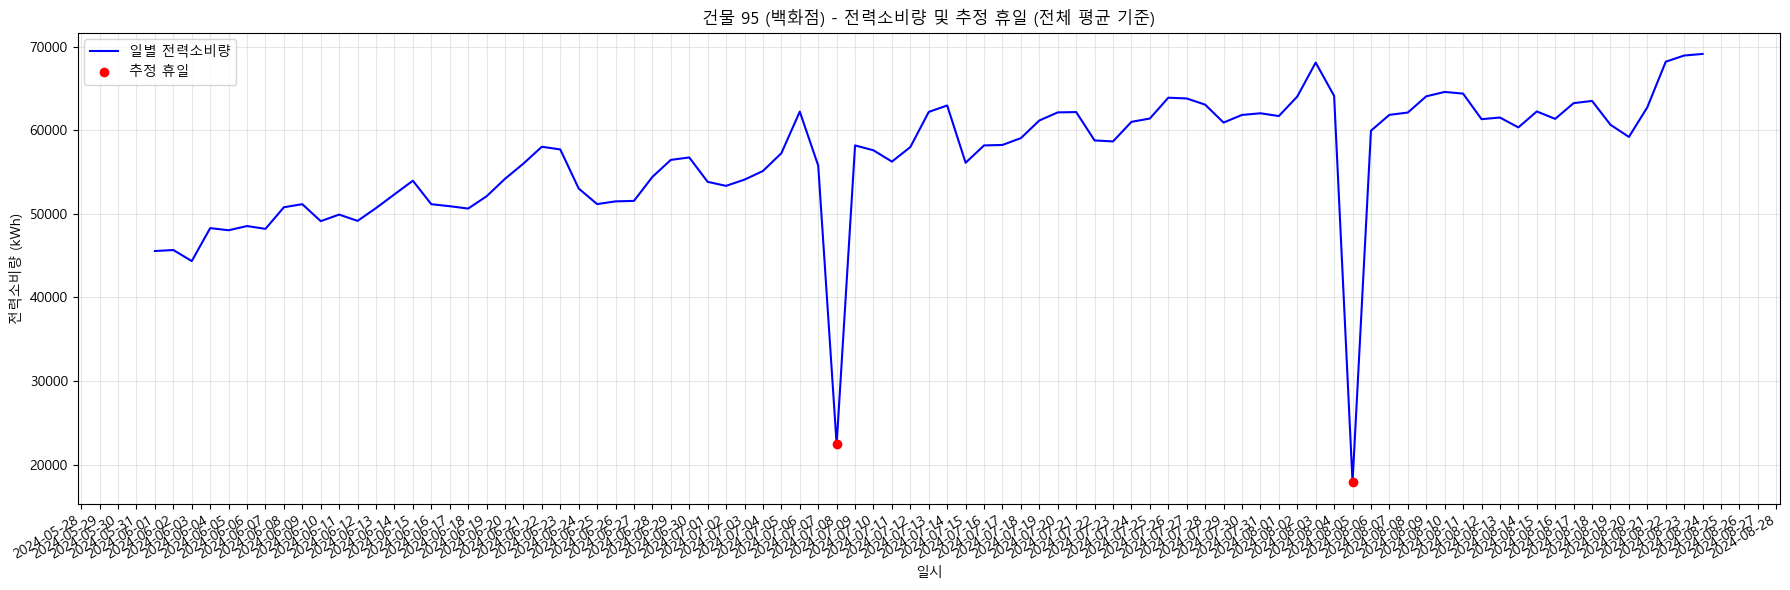

95


In [30]:
n = 15
plot_with_inferred_holidays(department_store_buildings[n], train_processed, threshold_ratio=0.7)
print(department_store_buildings[n])